In [1]:
#Cluster Docs
#The task here is whether we can cluster the tweets into meaningful categories
# uses some concepts from vectorize_pca.ipynb

#To Do:
# filter out duplicate type statements
# optimize DBSCAN
# note: lots of similar tweets, this could bias the model
# --> still wondering how to deal with this (remove if similarity between tweets is > x?)

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import spacy
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
train_df = pd.read_csv("data/processed_train.csv")
nlp = spacy.load("en_core_web_md")

In [4]:
train_df = train_df.drop(columns = ['keyword', 'location'])

In [5]:
train_df.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
def vectorize(item):
    doc = nlp(item)
    return doc.vector

In [7]:
#Get document vectors
train_vectorized = pd.DataFrame(np.vstack([vectorize(entry) for entry in train_df.text]))

In [8]:
final_df = pd.concat([train_df[['id']], train_vectorized], axis = 1)

In [9]:
final_df

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1,-0.278979,0.103926,-0.099896,-0.033250,0.006406,-0.127988,0.015576,0.162036,0.019861,...,-0.308163,0.127427,-0.153923,-0.059484,0.200914,-0.077234,-0.056179,0.045646,-0.063259,-0.056399
1,4,-0.064835,0.060354,-0.166393,-0.344203,0.306547,0.060459,0.205219,-0.072670,-0.099532,...,-0.063258,0.121803,0.005085,-0.031410,0.151826,0.067330,0.063014,-0.075697,-0.233015,0.096144
2,5,-0.024668,0.059286,-0.071322,-0.074969,0.103867,-0.124814,0.033703,-0.014304,-0.062268,...,-0.208227,0.020313,0.125149,-0.040904,-0.067651,-0.032820,-0.193037,-0.054479,0.056526,0.039146
3,6,-0.167660,0.244378,0.077987,-0.135558,-0.028106,-0.211794,-0.039319,0.010273,0.064539,...,-0.182993,0.181690,0.172492,-0.032437,-0.200355,-0.176960,-0.162615,-0.040300,0.026279,-0.030382
4,7,-0.068673,0.062337,0.030137,0.077085,0.084789,0.005437,-0.042100,-0.084338,-0.041983,...,-0.056272,0.148307,0.154113,0.114311,0.023254,-0.064449,-0.169256,-0.071676,-0.166943,0.135751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,10859,-0.186161,0.113815,0.094005,0.000995,0.010133,-0.139870,0.089990,0.093344,-0.056457,...,-0.163476,0.110591,0.000260,-0.013549,0.287260,0.039154,-0.060248,-0.174971,-0.055622,-0.070145
6966,10860,0.000344,0.181096,0.028255,-0.016016,0.085192,-0.114734,-0.020714,-0.187098,-0.013545,...,-0.192377,0.117305,0.130292,0.032662,0.147408,0.000271,-0.083110,0.088316,-0.067450,0.071719
6967,10862,-0.133278,0.247608,-0.079417,-0.030117,0.118461,-0.154476,-0.027068,-0.102124,0.146298,...,-0.073804,0.114880,-0.010113,-0.100306,-0.028117,-0.047617,-0.132302,-0.040492,-0.033955,0.165996
6968,10864,0.003865,0.157701,-0.186379,0.006686,0.086141,-0.030631,-0.011705,-0.118290,0.000729,...,-0.218744,0.054065,0.040499,-0.124812,0.061617,-0.020381,-0.027115,-0.014669,0.075943,0.227867


In [10]:
kmeans = KMeans()

In [11]:
kmeans.fit(final_df.drop(columns = 'id'))

KMeans()

In [12]:
kmeans.labels_


array([7, 6, 7, ..., 7, 1, 4], dtype=int32)

In [13]:
# we do get clusters, but we Scikit KMeans only does euclidean distance, while ideally, we want to use cosine similarity

In [14]:
dbscan = DBSCAN(metric = 'cosine', eps = 0.1)

In [15]:
dbscan.fit(final_df.drop(columns= 'id'))

DBSCAN(eps=0.1, metric='cosine')

In [16]:
cluster_map = pd.concat([final_df[['id']], pd.DataFrame(dbscan.labels_, columns = ['cluster'])], axis = 1)

In [17]:
cluster_map.head()

,id,cluster
0,1,0
1,4,-1
2,5,0
3,6,-1
4,7,-1


In [18]:
master_df = pd.merge(cluster_map, train_df)

In [19]:
master_df.head()

,id,cluster,text,target
0,1,0,Our Deeds are the Reason of this #earthquake M...,1
1,4,-1,Forest fire near La Ronge Sask. Canada,1
2,5,0,All residents asked to 'shelter in place' are ...,1
3,6,-1,"13,000 people receive #wildfires evacuation or...",1
4,7,-1,Just got sent this photo from Ruby #Alaska as ...,1


In [20]:
master_df[master_df['cluster'] == 5]
# this is really interesting because there seems to be duplicates, and yet target seems to be inconsistent

,id,cluster,text,target
352,558,5,Los Angeles Times: Arson suspect linked to 30 ...,1
357,565,5,Arson suspect linked to 30 fires caught in Nor...,1
364,575,5,RelaxInPR: miprv: RT latimes: Arson suspect li...,1
370,588,5,Arson suspect linked to 30 fires caught in Nor...,1
372,592,5,Arson suspect linked to 30 fires caught in Nor...,1


In [21]:
list(master_df[master_df['cluster'] == 5].text)

['Los Angeles Times: Arson suspect linked to 30 fires caught in Northern ... -   #NewsInTweets',
 'Arson suspect linked to 30 fires caught in Northern California',
 'RelaxInPR: miprv: RT latimes: Arson suspect linked to 30 fires caught in Northern California',
 'Arson suspect linked to 30 fires caught in Northern California   (via @latimes)',
 'Arson suspect linked to 30 fires caught in Northern California - Los Angeles Times']

In [22]:
# to test for above, let's take a look at the original dataframe (confirmed in the original--> need to remove duplicates then)
train_df[train_df['id'].isin([349,355, 356, 360, 370, 381, 384, 393, 394])]

,id,text,target
224,349,U.S National Park Services Tonto National Fore...,0
238,381,Stop the Annihilation of the Salt River Wild H...,1


In [23]:
list(master_df[master_df['cluster'] == 5].text)

['Los Angeles Times: Arson suspect linked to 30 fires caught in Northern ... -   #NewsInTweets',
 'Arson suspect linked to 30 fires caught in Northern California',
 'RelaxInPR: miprv: RT latimes: Arson suspect linked to 30 fires caught in Northern California',
 'Arson suspect linked to 30 fires caught in Northern California   (via @latimes)',
 'Arson suspect linked to 30 fires caught in Northern California - Los Angeles Times']

Interestingly, everything from this cluster is the same tweet, but just from a different url. Need to be able to filter these out with some sort of rule

In [63]:
# Want to see how the number of clusters changes with change in eps (also get cluster sizes)
def cluster_text(df, eps, results, min_pt = 5):
    
    # Initiate DBSCAN using cosine distance for text
    dbscan = DBSCAN(metric = 'cosine', eps = eps, min_samples = min_pt)
    dbscan.fit(df.drop(columns= 'id'))
    
    # convert labels to a dataframe
    cluster_df = pd.DataFrame(dbscan.labels_, columns = ['cluster'])
    
    # isolate rows that don't belong to a cluster --> considered outliers
    outlier_cluster = cluster_df[cluster_df['cluster']== -1]

    # update dictionary to capture the number of outliers in each trial
    results['outlier_num'].append(len(outlier_cluster))
    
    # get the cluster counts
    cluster_counts = cluster_df.groupby('cluster').size()# gets counts for each cluster
    
    # cluster_counts.groupby('cluster').size()
    return cluster_counts


In [64]:
# cluster_text(final_df,0.1)

One of the question is what min pt value should we use. This should be made from domain knowledge. My thinking is that if we make the min value too small then this could give rise to having clusters of "duplicate" tweets. So maybe we need to up that. First lets scan over a bunch of eps and see if we can address the min point problem after

In [65]:
# Initate dictionary to capture results
result_dict = {'eps':[], 'cluster_amt':[], 'outlier_num': []}

# initiate eps space to crawl over
eps_space = list(np.linspace(0.01,1, num = 30))

# loop over each eps value
for value in eps_space:
    
    cluster_counts = cluster_text(final_df, value, result_dict)
    result_dict['eps'].append(value)
    result_dict['cluster_amt'].append(len(cluster_counts))

In [66]:
results = pd.DataFrame(result_dict).head(10)
results['percent_outlier'] = results['outlier_num']/ len(final_df) 

In [67]:
results.head(10)

,eps,cluster_amt,outlier_num,percent_outlier
0,0.010000,9,6915,0.992109
1,0.044138,29,6332,0.908465
2,0.078276,42,4193,0.601578
3,0.112414,33,2508,0.359828
4,0.146552,16,1365,0.195839
5,0.180690,13,714,0.102439
6,0.214828,6,345,0.049498
7,0.248966,2,173,0.024821
8,0.283103,2,83,0.011908
9,0.317241,2,45,0.006456


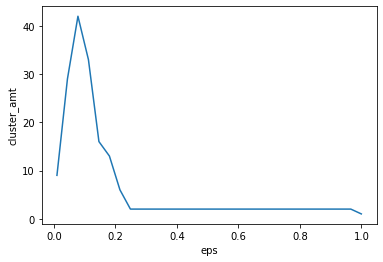

In [68]:
sns.lineplot(data = pd.DataFrame(result_dict), x = 'eps', y = 'cluster_amt')

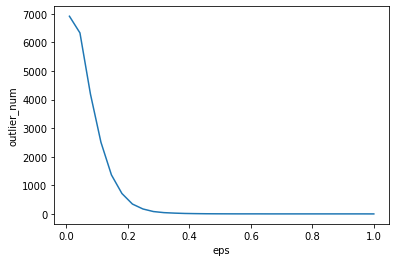

In [69]:
sns.lineplot(data = pd.DataFrame(result_dict), x = 'eps', y = 'outlier_num')

eps values of 0.21,  and 0.24 are the most interesting to me so I want to take a closer look at those.

In [45]:
def elaborate_dbscan(df, eps, min_pt = 5):
    
    # Initiate DBSCAN using cosine distance for text
    dbscan = DBSCAN(metric = 'cosine', eps = eps, min_samples = min_pt)
    dbscan.fit(df.drop(columns= 'id'))
    
    # convert labels to a dataframe
    cluster_df = pd.DataFrame(dbscan.labels_, columns = ['cluster'])
    
    # get the cluster counts
#     cluster_counts = cluster_df.groupby('cluster').size()# gets counts for each cluster
    
    # cluster_counts.groupby('cluster').size()
    return cluster_df

In [48]:
eps_2148 = elaborate_dbscan(final_df, eps = 0.2148)

In [49]:
eps_2148.groupby('cluster').size()

cluster
-1     346
 0    6590
 1      19
 2       5
 3       5
 4       5
dtype: int64

In [77]:
mapped_df = pd.concat([train_df, eps_2148], axis = 1)

In [80]:
# This cluster shows 
mapped_df[mapped_df['cluster'] == 1]

,id,text,target,cluster
2524,3848,Ignition Knock (Detonation) Sensor-Senso Stand...,0,1
2525,3849,Ignition Knock (Detonation) Sensor Connector-C...,0,1
2526,3850,Ignition Knock (Detonation) Sensor-Senso Stand...,0,1
2527,3851,Ignition Knock (Detonation) Sensor-Senso Stand...,0,1
2528,3853,Ignition Knock (Detonation) Sensor-Senso Stand...,1,1
2529,3855,Dorman 917-033 Ignition Knock (Detonation) Sen...,1,1
2533,3860,Ignition Knock (Detonation) Sensor-Senso fits ...,1,1
2534,3862,Ignition Knock (Detonation) Sensor-KNOCK SENSO...,0,1
2535,3864,Ignition Knock (Detonation) Sensor Connector-C...,0,1
2536,3866,Ignition Knock (Detonation) Sensor-Senso BECK/...,1,1


In [81]:
list(mapped_df[mapped_df['cluster'] == 1].text) # none of these tweets make sense, although maybe detonation is a trigger word

['Ignition Knock (Detonation) Sensor-Senso Standard fits 03-08 Mazda 6 3.0L-V6',
 'Ignition Knock (Detonation) Sensor Connector-Connecto MOTORCRAFT WPT-994',
 'Ignition Knock (Detonation) Sensor-Senso Standard KS161',
 'Ignition Knock (Detonation) Sensor-Senso Standard KS57',
 'Ignition Knock (Detonation) Sensor-Senso Standard KS94',
 'Dorman 917-033 Ignition Knock (Detonation) Sensor Connector',
 'Ignition Knock (Detonation) Sensor-Senso fits 01-06 BMW 325Ci 2.5L-L6',
 'Ignition Knock (Detonation) Sensor-KNOCK SENSOR Delphi AS10004',
 'Ignition Knock (Detonation) Sensor Connector-Connecto MOTORCRAFT WPT-410',
 'Ignition Knock (Detonation) Sensor-Senso BECK/ARNLEY 158-0853',
 'New SMP Ignition Knock (Detonation) Sensor KS315',
 'Ignition Knock (Detonation) Sensor-Senso Standard KS100',
 'Ignition Knock (Detonation) Sensor-Senso BECK/ARNLEY 158-1017',
 'Ignition Knock (Detonation) Sensor ACDelco GM Original Equipment 213-924',
 'Ignition Knock (Detonation) Sensor ACDelco GM Original Equ

In [82]:
mapped_df[mapped_df['cluster'] == 2]

,id,text,target,cluster
4760,7306,US Navy Sidelines 3 Newest Subs - DefenseNew...,1,2
4762,7309,US Navy Sidelines 3 Newest Subs,0,2
4775,7326,Navy sidelines 3 newest subs,0,2
4776,7328,US Navy Sidelines 3 Newest #Subs,0,2
4787,7343,HamptonRoadsFor.me US Navy Sidelines 3 Newest ...,0,2


In [83]:
list(mapped_df[mapped_df['cluster'] == 2].text)

['US Navy Sidelines 3 Newest Subs -   DefenseNews.comUS Navy Sidelines 3 Newest SubsD...   #navy',
 'US Navy Sidelines 3 Newest Subs',
 'Navy sidelines 3 newest subs',
 'US Navy Sidelines 3 Newest #Subs',
 'HamptonRoadsFor.me US Navy Sidelines 3 Newest Subs -']

In [84]:
mapped_df[mapped_df['cluster'] == 3]

,id,text,target,cluster
5476,8543,@DaneMillar1 *screams 666*,0,3
5480,8550,*screams internally*,0,3
5481,8551,*screams*,0,3
5491,8567,@RealJaxClone *screams*,0,3
5508,8589,* Screams *,0,3


In [85]:
mapped_df[mapped_df['cluster'] == 4]

,id,text,target,cluster
6477,10120,Ancient Mayan Tablet with Hieroglyphics Honors...,0,4
6483,10130,Ancient Mayan Tablet Found in Jungle Temple,1,4
6487,10140,RT '@LiveScience: Ancient Mayan Tablet with Hi...,0,4
6488,10141,Ancient Mayan Tablet with Hieroglyphics Honors...,0,4
6490,10143,Ancient Mayan Tablet found via,0,4


In [88]:
list(mapped_df[mapped_df['cluster'] == 4].text)

['Ancient Mayan Tablet with Hieroglyphics Honors Lowly King',
 'Ancient Mayan Tablet Found in Jungle Temple',
 "RT '@LiveScience: Ancient Mayan Tablet with Hieroglyphics Honors Lowly King:",
 'Ancient Mayan Tablet with Hieroglyphics Honors Lowly King: A 1600-year-old Mayan stone tablet describing the ...',
 'Ancient Mayan Tablet found via']

Not really sure at this point if the targets have been assigned very well. The Mayan tablet really shouldn't be targetted as a natural diaster. On the bright side, DBSCAN is able to find similar tweets, but I believe the high dimensionality of the dataset is making it difficult to distinguish between a bulk of tweets. There are a few options from here:

- scan doc similarity for all docs, plot and set a cutoff  --> would need to come up with rule for assigning targets
- normalize the word vecs and try clustering
- do PCA to reduce the dimensions of the data and try clustering again